In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function
lat_lngs = zip(lats, lngs)
lat_lngs
#When we run this cell, the output is a zip object in memory.
#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module
#import citypy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)



In [6]:
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# bulilding the basic URL for the openweathermap with weather_api_key added to the url
#Starting URL for Weather Map API Call, saves the url as a variable.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fad67c3886c40cba4f9f44665ecdabba


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
#In the code block, we have initialized the counters at 1 because we want the first 
#iteration of the logging for each recorded response and the set to start at 1.

# Loop through all the cities in our list.Let's use the enumerate() method to get the 
#index of the city for logging purposes and the city for creating an endpoint URL.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | corlu
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | batagay-alyta
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | taga
Processing Record 7 of Set 1 | marsh harbour
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | cololaca
Processing Record 10 of Set 1 | velikiy ustyug
Processing Record 11 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 12 of Set 1 | shimoda
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | le port
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | san vicente
Processing Record 19 of Set 1 | aranos
Processing Record 20 of Set 1 | takoradi
Processing Record 21 of Set 1 | nouadhibou
Processin

Processing Record 37 of Set 4 | sterling
Processing Record 38 of Set 4 | bo rai
Processing Record 39 of Set 4 | vasai
Processing Record 40 of Set 4 | saleaula
City not found. Skipping...
Processing Record 41 of Set 4 | awbari
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | zhuhai
Processing Record 44 of Set 4 | hobyo
Processing Record 45 of Set 4 | beringovskiy
Processing Record 46 of Set 4 | kaitong
Processing Record 47 of Set 4 | thenzawl
Processing Record 48 of Set 4 | bathsheba
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | bartlett
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | turayf
Processing Record 3 of Set 5 | schwarzenbek
Processing Record 4 of Set 5 | airai
Processing Record 5 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 5 | vite
Processing Record 7 of Set 5 | bandarbeyla
Processing Record 8 of Set 5 | sola
Processing Record 9 of Set 5 | nanortalik
Processing Re

Processing Record 27 of Set 8 | russell
Processing Record 28 of Set 8 | urusha
Processing Record 29 of Set 8 | willowmore
Processing Record 30 of Set 8 | beaverlodge
Processing Record 31 of Set 8 | vostok
Processing Record 32 of Set 8 | rio grande
Processing Record 33 of Set 8 | alofi
Processing Record 34 of Set 8 | beyneu
Processing Record 35 of Set 8 | kungurtug
Processing Record 36 of Set 8 | sinazongwe
Processing Record 37 of Set 8 | carnduff
Processing Record 38 of Set 8 | lexington
Processing Record 39 of Set 8 | leninsk
Processing Record 40 of Set 8 | sampit
Processing Record 41 of Set 8 | yulara
Processing Record 42 of Set 8 | rizhao
Processing Record 43 of Set 8 | bongandanga
Processing Record 44 of Set 8 | kulu
Processing Record 45 of Set 8 | the pas
Processing Record 46 of Set 8 | grindavik
Processing Record 47 of Set 8 | coquimbo
Processing Record 48 of Set 8 | fortuna
Processing Record 49 of Set 8 | ouadda
Processing Record 50 of Set 8 | kincardine
Processing Record 1 of S

Processing Record 20 of Set 12 | sackville
Processing Record 21 of Set 12 | teluknaga
Processing Record 22 of Set 12 | rawson
Processing Record 23 of Set 12 | mocambique
City not found. Skipping...
Processing Record 24 of Set 12 | dawei
Processing Record 25 of Set 12 | semenivka
Processing Record 26 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 27 of Set 12 | afrikanda
Processing Record 28 of Set 12 | dali
Processing Record 29 of Set 12 | makakilo city
Processing Record 30 of Set 12 | gasa
Processing Record 31 of Set 12 | cairns
Processing Record 32 of Set 12 | fuling
Processing Record 33 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 34 of Set 12 | kingsland
Processing Record 35 of Set 12 | rio cuarto
Processing Record 36 of Set 12 | kabare
Processing Record 37 of Set 12 | ituporanga
Processing Record 38 of Set 12 | baghdad
Processing Record 39 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 40 of Set 12 | 

In [28]:
len(city_data)

560

In [29]:
#You have the data in a list of dictionaries, which is a format that you can use to create a 
#Pandas DataFrame. You will also need to export the DataFrame as a CSV file
#Our next steps will entail converting the array of dictionaries to a DataFrame, 
#ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Corlu,41.1592,27.8000,59.00,77,40,8.05,TR,2021-02-04 14:51:56
1,Klaksvik,62.2266,-6.5890,35.60,64,40,23.02,FO,2021-02-04 14:50:07
2,Batagay-Alyta,67.8006,130.4114,-31.25,70,0,1.32,RU,2021-02-04 14:51:57
3,Ushuaia,-54.8000,-68.3000,57.20,77,75,35.68,AR,2021-02-04 14:49:41
4,Taga,46.9500,24.0500,55.40,54,40,25.32,RO,2021-02-04 14:51:57
5,Marsh Harbour,26.5412,-77.0636,64.29,49,43,4.36,BS,2021-02-04 14:51:57
6,Hermanus,-34.4187,19.2345,75.00,66,39,5.01,ZA,2021-02-04 14:51:57
7,Cololaca,14.3000,-88.8833,59.00,82,20,6.91,HN,2021-02-04 14:51:58
8,Velikiy Ustyug,60.7644,46.3106,18.64,97,100,4.54,RU,2021-02-04 14:51:58
9,Shimoda,34.6667,138.9500,36.00,60,0,1.01,JP,2021-02-04 14:51:58


In [30]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Corlu,41.1592,27.8000,59.00,77,40,8.05,TR,2021-02-04 14:51:56
1,Klaksvik,62.2266,-6.5890,35.60,64,40,23.02,FO,2021-02-04 14:50:07
2,Batagay-Alyta,67.8006,130.4114,-31.25,70,0,1.32,RU,2021-02-04 14:51:57
3,Ushuaia,-54.8000,-68.3000,57.20,77,75,35.68,AR,2021-02-04 14:49:41
4,Taga,46.9500,24.0500,55.40,54,40,25.32,RO,2021-02-04 14:51:57
...,...,...,...,...,...,...,...,...,...
555,Pauini,-7.7136,-66.9764,87.13,63,100,3.53,BR,2021-02-04 14:53:33
556,Muhos,64.8080,25.9931,14.00,85,0,6.91,FI,2021-02-04 14:53:33
557,Waipawa,-41.4122,175.5153,55.40,71,40,24.16,NZ,2021-02-04 14:53:33
558,Kutum,14.2000,24.6667,75.69,18,36,16.84,SD,2021-02-04 14:51:02


In [31]:
new_column_order =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
#Then, we assign a new or the same DataFrame with new column order:
city_data_df = city_data_df[new_column_order]

In [32]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Corlu,TR,2021-02-04 14:51:56,41.1592,27.8000,59.00,77,40,8.05
1,Klaksvik,FO,2021-02-04 14:50:07,62.2266,-6.5890,35.60,64,40,23.02
2,Batagay-Alyta,RU,2021-02-04 14:51:57,67.8006,130.4114,-31.25,70,0,1.32
3,Ushuaia,AR,2021-02-04 14:49:41,-54.8000,-68.3000,57.20,77,75,35.68
4,Taga,RO,2021-02-04 14:51:57,46.9500,24.0500,55.40,54,40,25.32
...,...,...,...,...,...,...,...,...,...
555,Pauini,BR,2021-02-04 14:53:33,-7.7136,-66.9764,87.13,63,100,3.53
556,Muhos,FI,2021-02-04 14:53:33,64.8080,25.9931,14.00,85,0,6.91
557,Waipawa,NZ,2021-02-04 14:53:33,-41.4122,175.5153,55.40,71,40,24.16
558,Kutum,SD,2021-02-04 14:51:02,14.2000,24.6667,75.69,18,36,16.84


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data dataframe into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

#The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

#We've completed our tasks for making API calls, parsing the response, and collecting the data for our project. Before we move on to graphing and statistical analysis, let's update our GitHub repository.



In [34]:
#scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

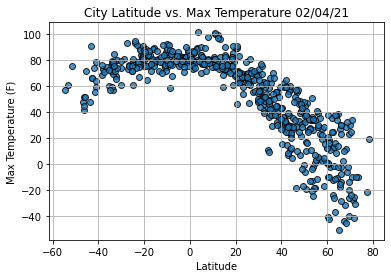

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

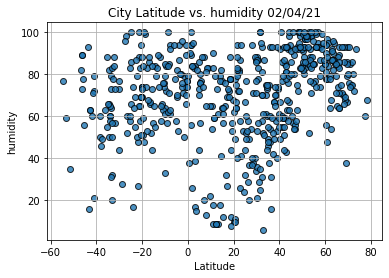

In [44]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. humidity "+ time.strftime("%x"))
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

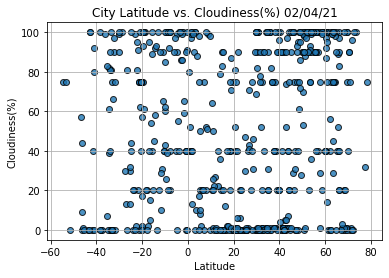

In [45]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

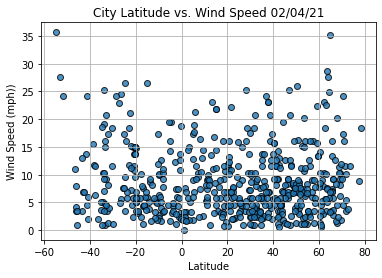

In [47]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()